# Álgebra lineal aplicada para ML

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# este funcion se utiliza para dibujar vectores
def graficarVectores(vecs, cols, alpha = 1):
    plt.axvline(x = 0, color="grey", zorder = 0)    
    plt.axhline(y = 0, color="grey", zorder = 0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        plt.quiver([x[0]],
                    [x[1]],
                    [x[2]],  
                    [x[3]],
                    angles = "xy", scale_units = "xy",
                    scale =1,
                    color = cols[i],
                    alpha = alpha
        )

## Transformaciones lineales

In [5]:
A = np.array([[-1,3],[2,-2]])
A

array([[-1,  3],
       [ 2, -2]])

In [6]:
vector = np.array([[2],[1]])
vector

array([[2],
       [1]])

(-0.5, 2.0)

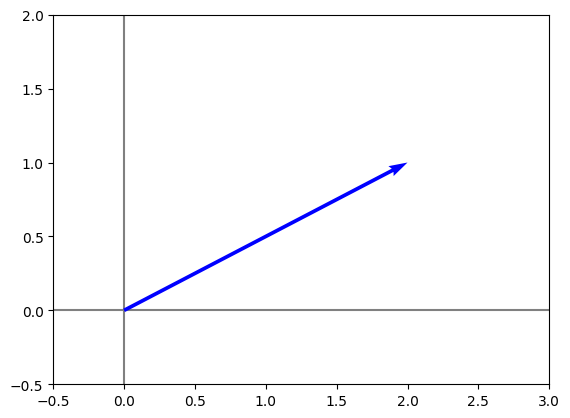

In [15]:
graficarVectores([vector.flatten()], cols ="blue")
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 2)


In [16]:
vector_transformado = A.dot(vector)
vector_transformado

array([[1],
       [2]])

(-0.5, 3.0)

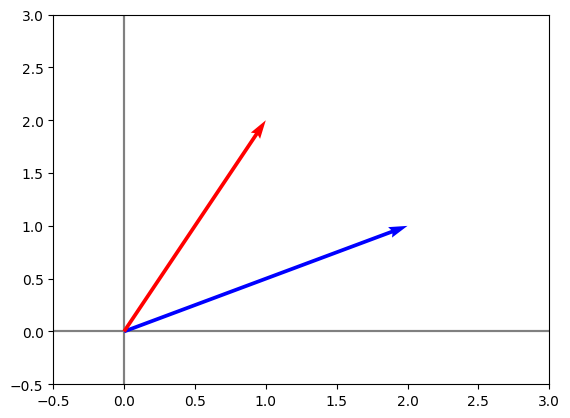

In [18]:
graficarVectores([vector.flatten()], cols ="blue")
graficarVectores([vector_transformado.flatten()], cols ="red")
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)

In [19]:
np.linalg.det(A)

-4.0

In [20]:
np.linalg.norm(vector)==np.linalg.norm(vector_transformado)

True

### Autovalores y autovectores

In [21]:
X = np.array([[3,2],[4,1]])
X

array([[3, 2],
       [4, 1]])

In [23]:
eigvalues, eigvectors = np.linalg.eig(X)

In [24]:
eigvalues

array([ 5., -1.])

In [25]:
eigvectors

array([[ 0.70710678, -0.4472136 ],
       [ 0.70710678,  0.89442719]])

In [30]:
v = np.array([[-1],[2]])
Xv = X.dot(v)
v_np = eigvectors[:,1]

(-2.0, 2.0)

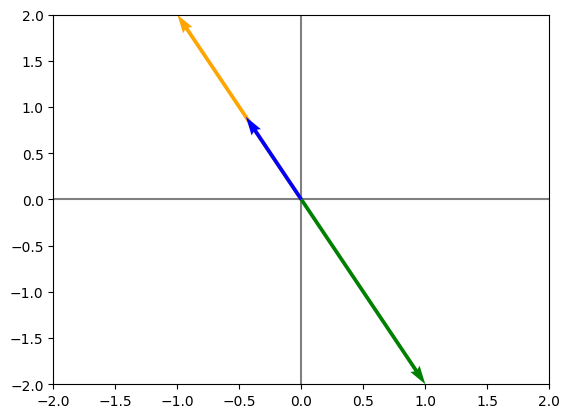

In [37]:
graficarVectores([v.flatten(), Xv.flatten(), v_np.flatten()], cols =["orange", "green", "blue"])
plt.ylim(-2, 2)
plt.xlim(-2, 2)

### Descomposición de matrices
Una matriz $A$ se puede representar como:
$$
A = \begin{pmatrix}
eigvectors
\end{pmatrix}
\cdot 
\begin{pmatrix}
\lambda _{1} & 0 & 0 \\
0 & 0 \lambda _{2} & 0 \\
0 & 0  & \lambda _{3}
\end{pmatrix}
\cdot 
\begin{pmatrix}
eigenvectors
\end{pmatrix} ^{-1}

= V \cdot diag(\lambda) \cdot V^{-1}
$$

In [38]:
A_calc = eigvectors.dot(np.diag(eigvalues)).dot(np.linalg.inv(eigvectors))
A_calc

array([[3., 2.],
       [4., 1.]])

Otra forma de descomposición para matrices reales y simétricas:

In [39]:
B = np.array([[3,2],[2,3]])
B

array([[3, 2],
       [2, 3]])

In [40]:
A == A.T

array([[ True, False],
       [False,  True]])

In [42]:
eigvalues_B, eigvectors_B = np.linalg.eig(B)

Para este caso en el que $A = A^T$ se tiene que la descomposición se puede escribir como:
$$
A = V \cdot diag(\lambda) \cdot V^{T}
$$

La ventaja de esto es que computacionalmente transponer es menos costoso que invertir una matriz.

In [43]:
A = eigvectors_B.dot(np.diag(eigvalues_B)).dot(eigvectors_B.T)

#### Descomposición en valores singulares
Para matrices no cuadradas.

In [ ]:
A = np.array([[1,2,3],[4,5,6]])

In [51]:
U, D, V = np.linalg.svd(A)

In [52]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [53]:
np.diag(D)

array([[5., 0.],
       [0., 1.]])

In [54]:
V

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [58]:
U.dot(D).dot(V)

array([5., 1.])

In [59]:
def graficarMatrix(matriz, vectorCol=["red", "blue"]):
    #circulo unitario
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))

    #circulo unitario transformado
    x1 = matriz[0,0]*x + matriz[0,1]*y
    y1 = matriz[1,0]*x + matriz[1,1]*y

    x1_neg = matriz[0,0]*x - matriz[0,1]*y
    y1_neg = matriz[1,0]*x - matriz[1,1]*y

    #vectores
    u1 = [matriz[0,0], matriz[1,0]]
    v1 = [matriz[0,1], matriz[1,1]]

    graficarVectores([u1, v1], cols=[vectorCol[0], vectorCol[1]])
    plt.plot(x1, y1, "green", alpha = 0.7)
    plt.plot(x1_neg, y1_neg, "green", alpha=0.7)

In [60]:
A = np.array([[3,7],[5,2]])

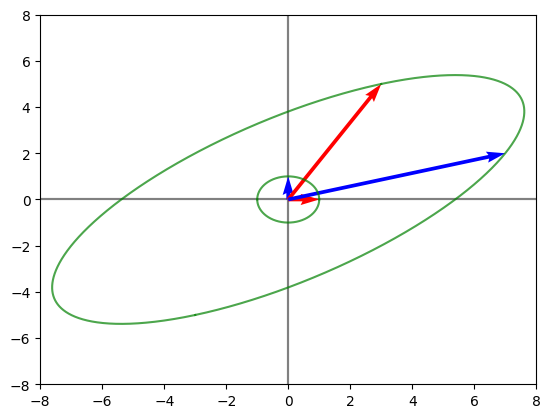

In [64]:
graficarMatrix(np.array([[1,0],[0,1]]))

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

graficarMatrix(A)

plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

In [69]:
U, D, V = np.linalg.svd(A)

In [70]:
U

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

In [71]:
V

array([[-0.59455781, -0.80405286],
       [ 0.80405286, -0.59455781]])

In [72]:
D

array([8.71337969, 3.32821489])

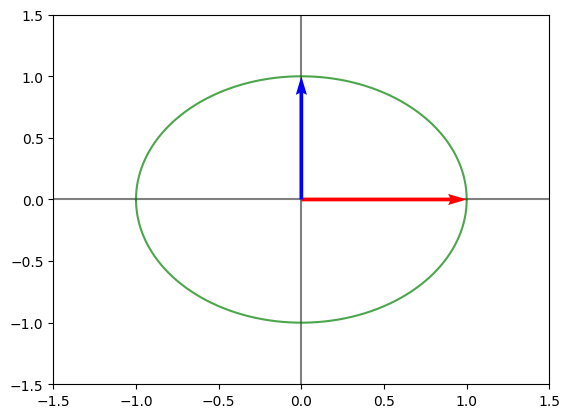

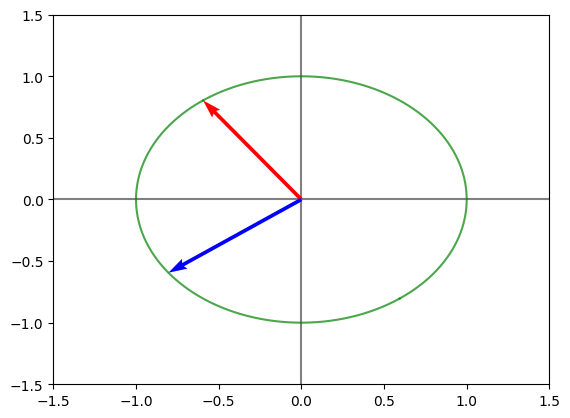

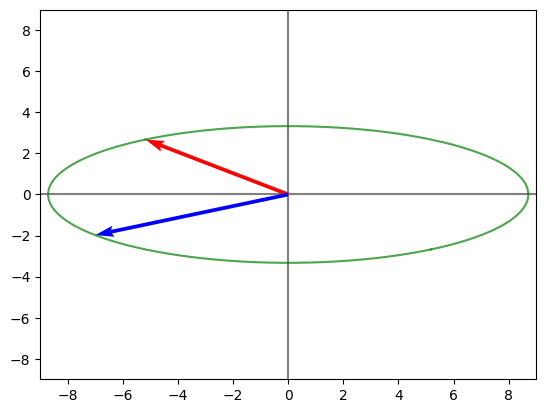

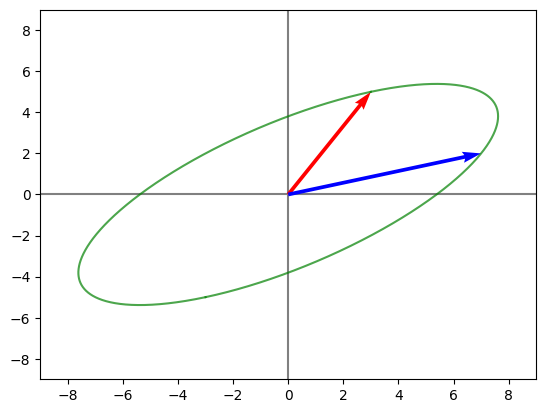

In [77]:
graficarMatrix(np.array([[1,0],[0,1]]))

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()
graficarMatrix(V)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()
graficarMatrix(np.diag(D).dot(V))

plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()
graficarMatrix(U.dot(np.diag(D).dot(V)))

plt.xlim(-9, 9)
plt.ylim(-9, 9)

plt.show()